In [2]:
import numpy as np
import matplotlib.pyplot as plt
from squlearn.feature_map import ChebPQC, YZ_CX_FeatureMap
from squlearn.kernel.matrix import FidelityKernel
from squlearn.util import Executor

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [3]:
num_qubits = 2
fmap = YZ_CX_FeatureMap(
    num_qubits,num_features=num_qubits,num_layers=2,c=1.0)
np.random.seed(0)
param = np.random.rand(fmap.num_parameters)
q_kernel = FidelityKernel(
    feature_map=fmap, executor=Executor('statevector_simulator'))
q_kernel.assign_parameters(param)

In [4]:
from squlearn.kernel.ml import QGPC
qgpc_tool = QGPC(q_kernel)

In [5]:
qgpc_tool.fit(X,Y)

QGPC(quantum_kernel=<squlearn.kernel.matrix.fidelity_kernel.FidelityKernel object at 0x000001E89A559C30>)

In [6]:
qgpc_tool.get_params()

{'quantum_kernel__feature_map': <squlearn.feature_map.feature_map_implemented.yz_cx_feature_map.YZ_CX_FeatureMap at 0x1e8d965b610>,
 'quantum_kernel__executor': <squlearn.util.executor.Executor at 0x1e8d7045300>,
 'quantum_kernel__initial_parameters': array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  ]),
 'quantum_kernel': <squlearn.kernel.matrix.fidelity_kernel.FidelityKernel at 0x1e89a559c30>}

In [7]:
Z = qgpc_tool.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]

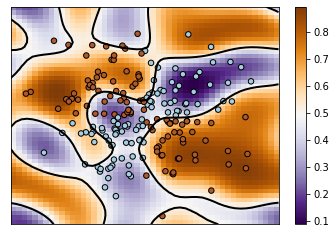

In [8]:
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, alpha=0.8)
image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.colorbar(image)